In [ ]:
aranceles = {
  # Imagen 1
  "COL": 10,  # Colombia
  "SGP": 10,  # Singapur
  "TUR": 10,  # Turquía
  "GBR": 10,  # Reino Unido
  
  # Imagen 2
  "PHL": 18,  # Filipinas
  "ZWE": 18,  # Zimbabue
  "ISR": 17,  # Israel
  "ZMB": 17,  # Zambia
  "MOZ": 16,  # Mozambique
  "NOR": 16,  # Noruega
  "VEN": 15,  # Venezuela
  "NGA": 14,  # Nigeria
  "TCD": 13,  # Chad
  "GNQ": 13,  # Guinea Ecuatorial
  "CMR": 12,  # Camerún
  "COD": 11,  # República Democrática del Congo
  "AUS": 10,  # Australia
  "BRA": 10,  # Brasil
  "CHL": 10,  # Chile
  
  # Imagen 3
  "PAK": 30,  # Pakistán
  "TUN": 28,  # Túnez
  "IND": 27,  # India
  "KAZ": 27,  # Kazajistán
  "KOR": 26,  # Corea del Sur
  "BRN": 24,  # Brunei
  "JPN": 24,  # Japón
  "MYS": 24,  # Malasia
  "VUT": 23,  # Vanuatu
  "CIV": 21,  # Costa de Marfil
  "NAM": 21,  # Namibia
  "JOR": 20,  # Jordania
  "NIC": 19,  # Nicaragua
  "MWI": 18,  # Malawi
  
  # Imagen 4
  "LIE": 37,  # Liechtenstein
  "THA": 37,  # Tailandia
  "BIH": 36,  # Bosnia-Herzegovina
  "CHN": 34,  # China
  "MKD": 33,  # Macedonia del Norte
  "AGO": 32,  # Angola
  "FJI": 32,  # Fiyi
  "IDN": 32,  # Indonesia
  "CHE": 32,  # Suiza
  "TWN": 32,  # Taiwán
  "LBY": 31,  # Libia
  "MDA": 31,  # Moldavia
  "ZAF": 31,  # Sudáfrica
  "DZA": 30,  # Argelia
  "NRU": 30,  # Nauru
  
  # Imagen 5
  "LSO": 50,  # Lesoto
  "KHM": 49,  # Camboya
  "LAO": 48,  # Laos
  "MDG": 47,  # Madagascar
  "VNM": 46,  # Vietnam
  "MMR": 45,  # Myanmar
  "LKA": 44,  # Sri Lanka
  "FLK": 42,  # Islas Malvinas/Falklands
  "SYR": 41,  # Siria
  "MUS": 40,  # Mauricio
  "IRQ": 39,  # Irak
  "BWA": 38,  # Botsuana
  "GUY": 38,  # Guyana
  "SRB": 38,  # Serbia
  "BGD": 37,  # Bangladesh
  
  # Países de la Unión Europea (todos con arancel del 20%)
  "AUT": 20,  # Austria
  "BEL": 20,  # Bélgica
  "BGR": 20,  # Bulgaria
  "HRV": 20,  # Croacia
  "CYP": 20,  # Chipre
  "CZE": 20,  # República Checa
  "DNK": 20,  # Dinamarca
  "EST": 20,  # Estonia
  "FIN": 20,  # Finlandia
  "FRA": 20,  # Francia
  "DEU": 20,  # Alemania
  "GRC": 20,  # Grecia
  "HUN": 20,  # Hungría
  "IRL": 20,  # Irlanda
  "ITA": 20,  # Italia
  "LVA": 20,  # Letonia
  "LTU": 20,  # Lituania
  "LUX": 20,  # Luxemburgo
  "MLT": 20,  # Malta
  "NLD": 20,  # Países Bajos
  "POL": 20,  # Polonia
  "PRT": 20,  # Portugal
  "ROU": 20,  # Rumanía
  "SVK": 20,  # Eslovaquia
  "SVN": 20,  # Eslovenia
  "ESP": 20,  # España
  "SWE": 20   # Suecia
}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import os
import gzip
from pathlib import Path

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import gzip
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as path_effects

# Configuración para gráficos de alta calidad
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
sns.set_style("whitegrid")

# Definir rutas
current_dir = Path.cwd()
base_path = current_dir.parent.parent.parent
files_path = base_path / "data" / "processed" / "ficheros_paper"
output_path_fig = current_dir / "figures" / "nota_elcano"
output_path_tabs = current_dir / "tables" / "nota_elcano"

# Crear directorios de salida si no existen
os.makedirs(output_path_fig, exist_ok=True)
os.makedirs(output_path_tabs, exist_ok=True)

# Cargar datos de dependencias
df_full = pd.read_csv(files_path / "dependencies_full.csv.gz", sep=";")
df_weighted = pd.read_csv(files_path / "weighted_dependencies.csv.gz", sep=";")
df_critical = pd.read_csv(files_path / "critical_relations.csv.gz", sep=";")
df_intermediary = pd.read_csv(files_path / "intermediary_roles.csv.gz", sep=";")
df_summary = pd.read_csv(files_path / "intermediary_summary.csv.gz", sep=";")

print("📊 Datos cargados correctamente")
print(f"Número de registros en df_full: {len(df_full)}")
print(f"Número de registros en df_intermediary: {len(df_intermediary)}")

# Sectores estratégicos para el análisis
sectores_estrategicos = [
    'Aircraft and spacecraft',
    'Accumulators primary cells and batteries',
    'Basic iron and steel',
    'Basic precious and non-ferrous metals',
    'Electronic valves tubes etc.',
    'TV and radio receivers and associated goods',
    'Office accounting and computing machinery',
    'Medical surgical and orthopaedic equipment',
    'Optical instruments & photographic equipment'
]

# Diccionario de aranceles
aranceles = {
  # Imagen 1
  "COL": 10,  # Colombia
  "SGP": 10,  # Singapur
  "TUR": 10,  # Turquía
  "GBR": 10,  # Reino Unido
  
  # Imagen 2
  "PHL": 18,  # Filipinas
  "ZWE": 18,  # Zimbabue
  "ISR": 17,  # Israel
  "ZMB": 17,  # Zambia
  "MOZ": 16,  # Mozambique
  "NOR": 16,  # Noruega
  "VEN": 15,  # Venezuela
  "NGA": 14,  # Nigeria
  "TCD": 13,  # Chad
  "GNQ": 13,  # Guinea Ecuatorial
  "CMR": 12,  # Camerún
  "COD": 11,  # República Democrática del Congo
  "AUS": 10,  # Australia
  "BRA": 10,  # Brasil
  "CHL": 10,  # Chile
  
  # Imagen 3
  "PAK": 30,  # Pakistán
  "TUN": 28,  # Túnez
  "IND": 27,  # India
  "KAZ": 27,  # Kazajistán
  "KOR": 26,  # Corea del Sur
  "BRN": 24,  # Brunei
  "JPN": 24,  # Japón
  "MYS": 24,  # Malasia
  "VUT": 23,  # Vanuatu
  "CIV": 21,  # Costa de Marfil
  "NAM": 21,  # Namibia
  "JOR": 20,  # Jordania
  "NIC": 19,  # Nicaragua
  "MWI": 18,  # Malawi
  
  # Imagen 4
  "LIE": 37,  # Liechtenstein
  "THA": 37,  # Tailandia
  "BIH": 36,  # Bosnia-Herzegovina
  "CHN": 34,  # China
  "MKD": 33,  # Macedonia del Norte
  "AGO": 32,  # Angola
  "FJI": 32,  # Fiyi
  "IDN": 32,  # Indonesia
  "CHE": 32,  # Suiza
  "TWN": 32,  # Taiwán
  "LBY": 31,  # Libia
  "MDA": 31,  # Moldavia
  "ZAF": 31,  # Sudáfrica
  "DZA": 30,  # Argelia
  "NRU": 30,  # Nauru
  
  # Imagen 5
  "LSO": 50,  # Lesoto
  "KHM": 49,  # Camboya
  "LAO": 48,  # Laos
  "MDG": 47,  # Madagascar
  "VNM": 46,  # Vietnam
  "MMR": 45,  # Myanmar
  "LKA": 44,  # Sri Lanka
  "FLK": 42,  # Islas Malvinas/Falklands
  "SYR": 41,  # Siria
  "MUS": 40,  # Mauricio
  "IRQ": 39,  # Irak
  "BWA": 38,  # Botsuana
  "GUY": 38,  # Guyana
  "SRB": 38,  # Serbia
  "BGD": 37,  # Bangladesh
  
  # Países de la Unión Europea (todos con arancel del 20%)
  "AUT": 20,  # Austria
  "BEL": 20,  # Bélgica
  "BGR": 20,  # Bulgaria
  "HRV": 20,  # Croacia
  "CYP": 20,  # Chipre
  "CZE": 20,  # República Checa
  "DNK": 20,  # Dinamarca
  "EST": 20,  # Estonia
  "FIN": 20,  # Finlandia
  "FRA": 20,  # Francia
  "DEU": 20,  # Alemania
  "GRC": 20,  # Grecia
  "HUN": 20,  # Hungría
  "IRL": 20,  # Irlanda
  "ITA": 20,  # Italia
  "LVA": 20,  # Letonia
  "LTU": 20,  # Lituania
  "LUX": 20,  # Luxemburgo
  "MLT": 20,  # Malta
  "NLD": 20,  # Países Bajos
  "POL": 20,  # Polonia
  "PRT": 20,  # Portugal
  "ROU": 20,  # Rumanía
  "SVK": 20,  # Eslovaquia
  "SVN": 20,  # Eslovenia
  "ESP": 20,  # España
  "SWE": 20   # Suecia
}

# Comprobar disponibilidad de los países con aranceles en los datos
paises_aranceles = set(aranceles.keys())
paises_dataset = set(df_full['supplier_country'].unique())
paises_comunes = paises_aranceles.intersection(paises_dataset)

print(f"Total de países con aranceles: {len(paises_aranceles)}")
print(f"Países encontrados en el dataset: {len(paises_comunes)}")
print(f"Países con aranceles no encontrados en el dataset: {len(paises_aranceles - paises_comunes)}")

📊 Datos cargados correctamente
Número de registros en df_full: 7278726
Número de registros en df_intermediary: 34159
Total de países con aranceles: 90
Países encontrados en el dataset: 90
Países con aranceles no encontrados en el dataset: 0


Ejercicio 1: Vulnerabilidad de EE.UU. por dependencia directa e indirecta
Análisis propuesto
Este ejercicio evaluaría cuán vulnerable es Estados Unidos a los aranceles que ha impuesto, analizando su propia dependencia de los países afectados. Visualizaríamos la relación entre el nivel arancelario y el grado de dependencia, identificando posibles "autolesiones" económicas.

In [16]:
def analizar_vulnerabilidad_eeuu(df_full, aranceles, output_path, min_dependency=0.005):
    """
    Analiza la vulnerabilidad de EE.UU. a sus propios aranceles.
    
    Args:
        df_full: DataFrame con datos de dependencia
        aranceles: Diccionario de países y sus aranceles
        output_path: Ruta para guardar visualizaciones
        min_dependency: Valor mínimo de dependencia para incluir en el gráfico
    """
    # Filtrar dependencias donde EE.UU. es el importador
    us_dependencies = df_full[df_full['dependent_country'] == 'USA'].copy()
    
    # Añadir columna de aranceles
    us_dependencies['tariff'] = us_dependencies['supplier_country'].map(
        lambda x: aranceles.get(x, 0)
    )
    
    # Calcular exposición ponderada (dependencia * arancel)
    us_dependencies['weighted_exposure'] = us_dependencies['dependency_value'] * us_dependencies['tariff'] / 100
    
    # Agrupar por país proveedor
    supplier_summary = []
    for country, group in us_dependencies.groupby('supplier_country'):
        # Calcular dependencia media ponderada por valor comercial
        weighted_dependency = np.average(
            group['dependency_value'],
            weights=group['trade_value']
        ) if group['trade_value'].sum() > 0 else group['dependency_value'].mean()
        
        # Calcular exposición media ponderada
        weighted_exposure = np.average(
            group['weighted_exposure'],
            weights=group['trade_value']
        ) if group['trade_value'].sum() > 0 else group['weighted_exposure'].mean()
        
        supplier_summary.append({
            'supplier_country': country,
            'dependency_value': weighted_dependency,
            'tariff': group['tariff'].iloc[0],  # Todos los registros del mismo país tienen el mismo arancel
            'weighted_exposure': weighted_exposure * len(group),  # Multiplicamos por el número de industrias
            'trade_value': group['trade_value'].sum(),
            'num_industries': len(group)
        })
    
    # Convertir a DataFrame
    supplier_summary = pd.DataFrame(supplier_summary)
    
    # Filtrar solo países con aranceles mayores que cero
    supplier_summary = supplier_summary[supplier_summary['tariff'] > 0]
    
    # Filtrar países con dependencia mínima para el gráfico
    supplier_summary_filtered = supplier_summary[supplier_summary['dependency_value'] >= min_dependency]
    
    # Contar cuántos países fueron filtrados por baja dependencia
    filtered_countries = len(supplier_summary) - len(supplier_summary_filtered)
    print(f"Se filtraron {filtered_countries} países por tener dependencia menor a {min_dependency}")
    
    # Calcular por sector para los países top
    sector_exposure = []
    # Solo consideramos los 5 países con mayor exposición para el análisis sectorial
    top_countries = supplier_summary.sort_values('weighted_exposure', ascending=False).head(5)['supplier_country'].tolist()
    
    for country in top_countries:
        country_data = us_dependencies[us_dependencies['supplier_country'] == country]
        
        for industry, industry_group in country_data.groupby('industry'):
            if industry_group['trade_value'].sum() > 0:
                weighted_exp = np.average(
                    industry_group['weighted_exposure'],
                    weights=industry_group['trade_value']
                )
                weighted_dep = np.average(
                    industry_group['dependency_value'],
                    weights=industry_group['trade_value']
                )
            else:
                weighted_exp = industry_group['weighted_exposure'].mean()
                weighted_dep = industry_group['dependency_value'].mean()
                
            sector_exposure.append({
                'supplier_country': country,
                'industry': industry,
                'dependency_value': weighted_dep,
                'weighted_exposure': weighted_exp,
                'trade_value': industry_group['trade_value'].sum()
            })
    
    sector_exposure = pd.DataFrame(sector_exposure)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(14, 10))  # Aumentamos el tamaño para acomodar más países
    
    # Normalizar el tamaño para evitar burbujas demasiado pequeñas o grandes
    min_size = 100
    max_size = 1000
    
    if supplier_summary_filtered['trade_value'].max() > 0:
        size_scale = supplier_summary_filtered['trade_value'] / supplier_summary_filtered['trade_value'].max() * (max_size - min_size) + min_size
    else:
        size_scale = [min_size] * len(supplier_summary_filtered)
    
    # Lista para guardar países UE para etiquetado especial
    eu_countries = []
    
    # Asignar regiones a países
    def get_region(country):
        eu_members = [
            "AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
            "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT", "NLD",
            "POL", "PRT", "ROU", "SVK", "SVN", "ESP", "SWE"
        ]
        asia_countries = [
            "CHN", "JPN", "KOR", "TWN", "VNM", "THA", "MYS", "IDN", "PHL", "SGP",
            "BRN", "KHM", "LAO", "MMR", "LKA", "BGD"
        ]
        latam_countries = [
            "MEX", "BRA", "ARG", "COL", "CHL", "PER", "VEN", "ECU", "NIC"
        ]
        
        if country in eu_members:
            return 'EU'
        elif country in asia_countries:
            return 'ASIA'
        elif country in latam_countries:
            return 'LATAM'
        else:
            return 'OTHER'
    
    supplier_summary_filtered['region'] = supplier_summary_filtered['supplier_country'].apply(get_region)
    
    # Crear un conjunto de colores basado en ponderación de exposición
    norm = plt.Normalize(supplier_summary_filtered['weighted_exposure'].min(), supplier_summary_filtered['weighted_exposure'].max())
    cmap = plt.cm.YlOrRd
    
    # Crear el scatter plot con una variable para almacenar el scatter
    scatter_plots = []
    scatter_labels = []
    
    for i, region in enumerate(['EU', 'ASIA', 'LATAM', 'OTHER']):
        region_data = supplier_summary_filtered[supplier_summary_filtered['region'] == region]
        
        if not region_data.empty:
            scatter = ax.scatter(
                region_data['dependency_value'], 
                region_data['tariff'],
                s=region_data['trade_value'] / supplier_summary_filtered['trade_value'].max() * (max_size - min_size) + min_size,
                c=region_data['weighted_exposure'],
                cmap=cmap,
                norm=norm,
                alpha=0.7,
                edgecolors='white',
                linewidth=0.5,
                label=region
            )
            scatter_plots.append(scatter)
            scatter_labels.append(region)
    
    # Anotar países
    for _, row in supplier_summary_filtered.iterrows():
        # Para países de la UE, usamos un estilo diferente
        if row['region'] == 'EU':
            eu_countries.append(row['supplier_country'])
            text = ax.annotate(
                row['supplier_country'],
                (row['dependency_value'], row['tariff']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8,
                color='blue',
                path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
            )
        else:
            text = ax.annotate(
                row['supplier_country'],
                (row['dependency_value'], row['tariff']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
            )
    
    # Etiquetas y título
    ax.set_xlabel('Dependencia de EE.UU. del país proveedor (media ponderada)', fontsize=12)
    ax.set_ylabel('Arancel impuesto (%)', fontsize=12)
    ax.set_title('Vulnerabilidad de EE.UU. a sus propios aranceles', fontsize=16)
    
    # Líneas de referencia
    ax.axhline(y=20, color='gray', linestyle='--', alpha=0.3)
    ax.axvline(x=0.3, color='gray', linestyle='--', alpha=0.3)
    
    # Colorbar - corregido para usar el eje actual
    if scatter_plots:  # Solo si hay al menos un scatter plot
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)  # Especificamos el eje
        cbar.set_label('Exposición ponderada (Dependencia × Arancel)', fontsize=10)
    
    # Leyenda para el tamaño de las burbujas
    # Crear tres ejemplos de tamaños para la leyenda
    trade_max = supplier_summary_filtered['trade_value'].max()
    trade_med = trade_max / 2
    trade_min = trade_max / 10
    
    # Convertir a tamaños para la leyenda
    size_max = min_size + (max_size - min_size)
    size_med = min_size + (max_size - min_size) / 2
    size_min = min_size + (max_size - min_size) / 10
    
    # Crear leyenda para tamaños
    handles = []
    labels = []
    
    # Añadir puntos de leyenda solo si hay datos válidos
    if trade_max > 0:
        for trade_value, size in [(trade_max, size_max), (trade_med, size_med), (trade_min, size_min)]:
            handles.append(plt.scatter([], [], s=size, c='gray', alpha=0.7, edgecolors='white', linewidth=0.5))
            labels.append(f'${trade_value/1e6:.1f}M')
    
    if handles and labels:
        legend1 = ax.legend(handles, labels, loc='upper right', title="Volumen Comercial", frameon=True)
        ax.add_artist(legend1)
        
    # Leyenda para regiones - solo si hay scatter plots
    if scatter_plots:
        legend_region = ax.legend(scatter_plots, scatter_labels, loc='upper left', title="Regiones")
        ax.add_artist(legend_region)
    
    # Añadir texto explicativo
    ax.text(0.02, 0.02, 
            "Mayor tamaño del círculo = Mayor volumen de comercio\n"
            "Mayor intensidad de color = Mayor exposición ponderada",
            transform=ax.transAxes, fontsize=9, verticalalignment='bottom')
    
    # Marcar cuadrantes
    plt.text(0.05, 0.95, "Baja dependencia\nBajo arancel", transform=ax.transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='left')
    plt.text(0.95, 0.95, "Alta dependencia\nBajo arancel", transform=ax.transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='right')
    plt.text(0.05, 0.05, "Baja dependencia\nAlto arancel", transform=ax.transAxes, 
             fontsize=10, verticalalignment='bottom', horizontalalignment='left')
    plt.text(0.95, 0.05, "Alta dependencia\nAlto arancel", transform=ax.transAxes, 
             fontsize=10, verticalalignment='bottom', horizontalalignment='right', 
             color='darkred', fontweight='bold')
    
    plt.tight_layout()
    
    # Guardar figura
    plt.savefig(output_path / "us_vulnerability_all.png", dpi=300, bbox_inches='tight')
    
    print(f"Gráfico guardado en: {output_path / 'us_vulnerability_all.png'}")
    
    # Verificar cuántos países de la UE están incluidos
    print(f"Países de la UE incluidos en el gráfico: {len(eu_countries)}")
    print(f"Lista de países de la UE: {', '.join(eu_countries)}")
    
    # También crear una tabla con todos los países
    countries_table = supplier_summary.sort_values('weighted_exposure', ascending=False)[['supplier_country', 'dependency_value', 'tariff', 'weighted_exposure', 'trade_value']]
    countries_table.columns = ['País', 'Dependencia promedio', 'Arancel (%)', 'Exposición ponderada', 'Volumen comercial']
    
    # Guardar tabla como CSV
    countries_table.to_csv(output_path / "all_countries_with_tariffs.csv", index=False)
    
    # También guardar como tabla LaTeX
    latex_table = countries_table.to_latex(index=False, float_format="%.4f")
    with open(output_path / "all_countries_with_tariffs.tex", "w") as f:
        f.write(latex_table)
    
    print(f"Tabla guardada en: {output_path / 'all_countries_with_tariffs.csv'}")
    
    return {
        'supplier_summary': supplier_summary, 
        'filtered_summary': supplier_summary_filtered,
        'sector_exposure': sector_exposure,
        'top_countries': top_countries,
        'eu_countries': eu_countries
    }

Se filtraron 20 países por tener dependencia menor a 0.005


C:\Users\Usuario\AppData\Local\Temp\ipykernel_32468\56967522.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supplier_summary_filtered['region'] = supplier_summary_filtered['supplier_country'].apply(get_region)


Gráfico guardado en: c:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\paper ISE\figures\us_vulnerability_all.png
Países de la UE incluidos en el gráfico: 25
Lista de países de la UE: AUT, BEL, BGR, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, GRC, HRV, HUN, IRL, ITA, LTU, LUX, LVA, NLD, POL, PRT, ROU, SVK, SWE
Tabla guardada en: c:\Users\Usuario\Documents\Github\Seguridad económica\src\notebooks\visualization\paper ISE\figures\all_countries_with_tariffs.csv


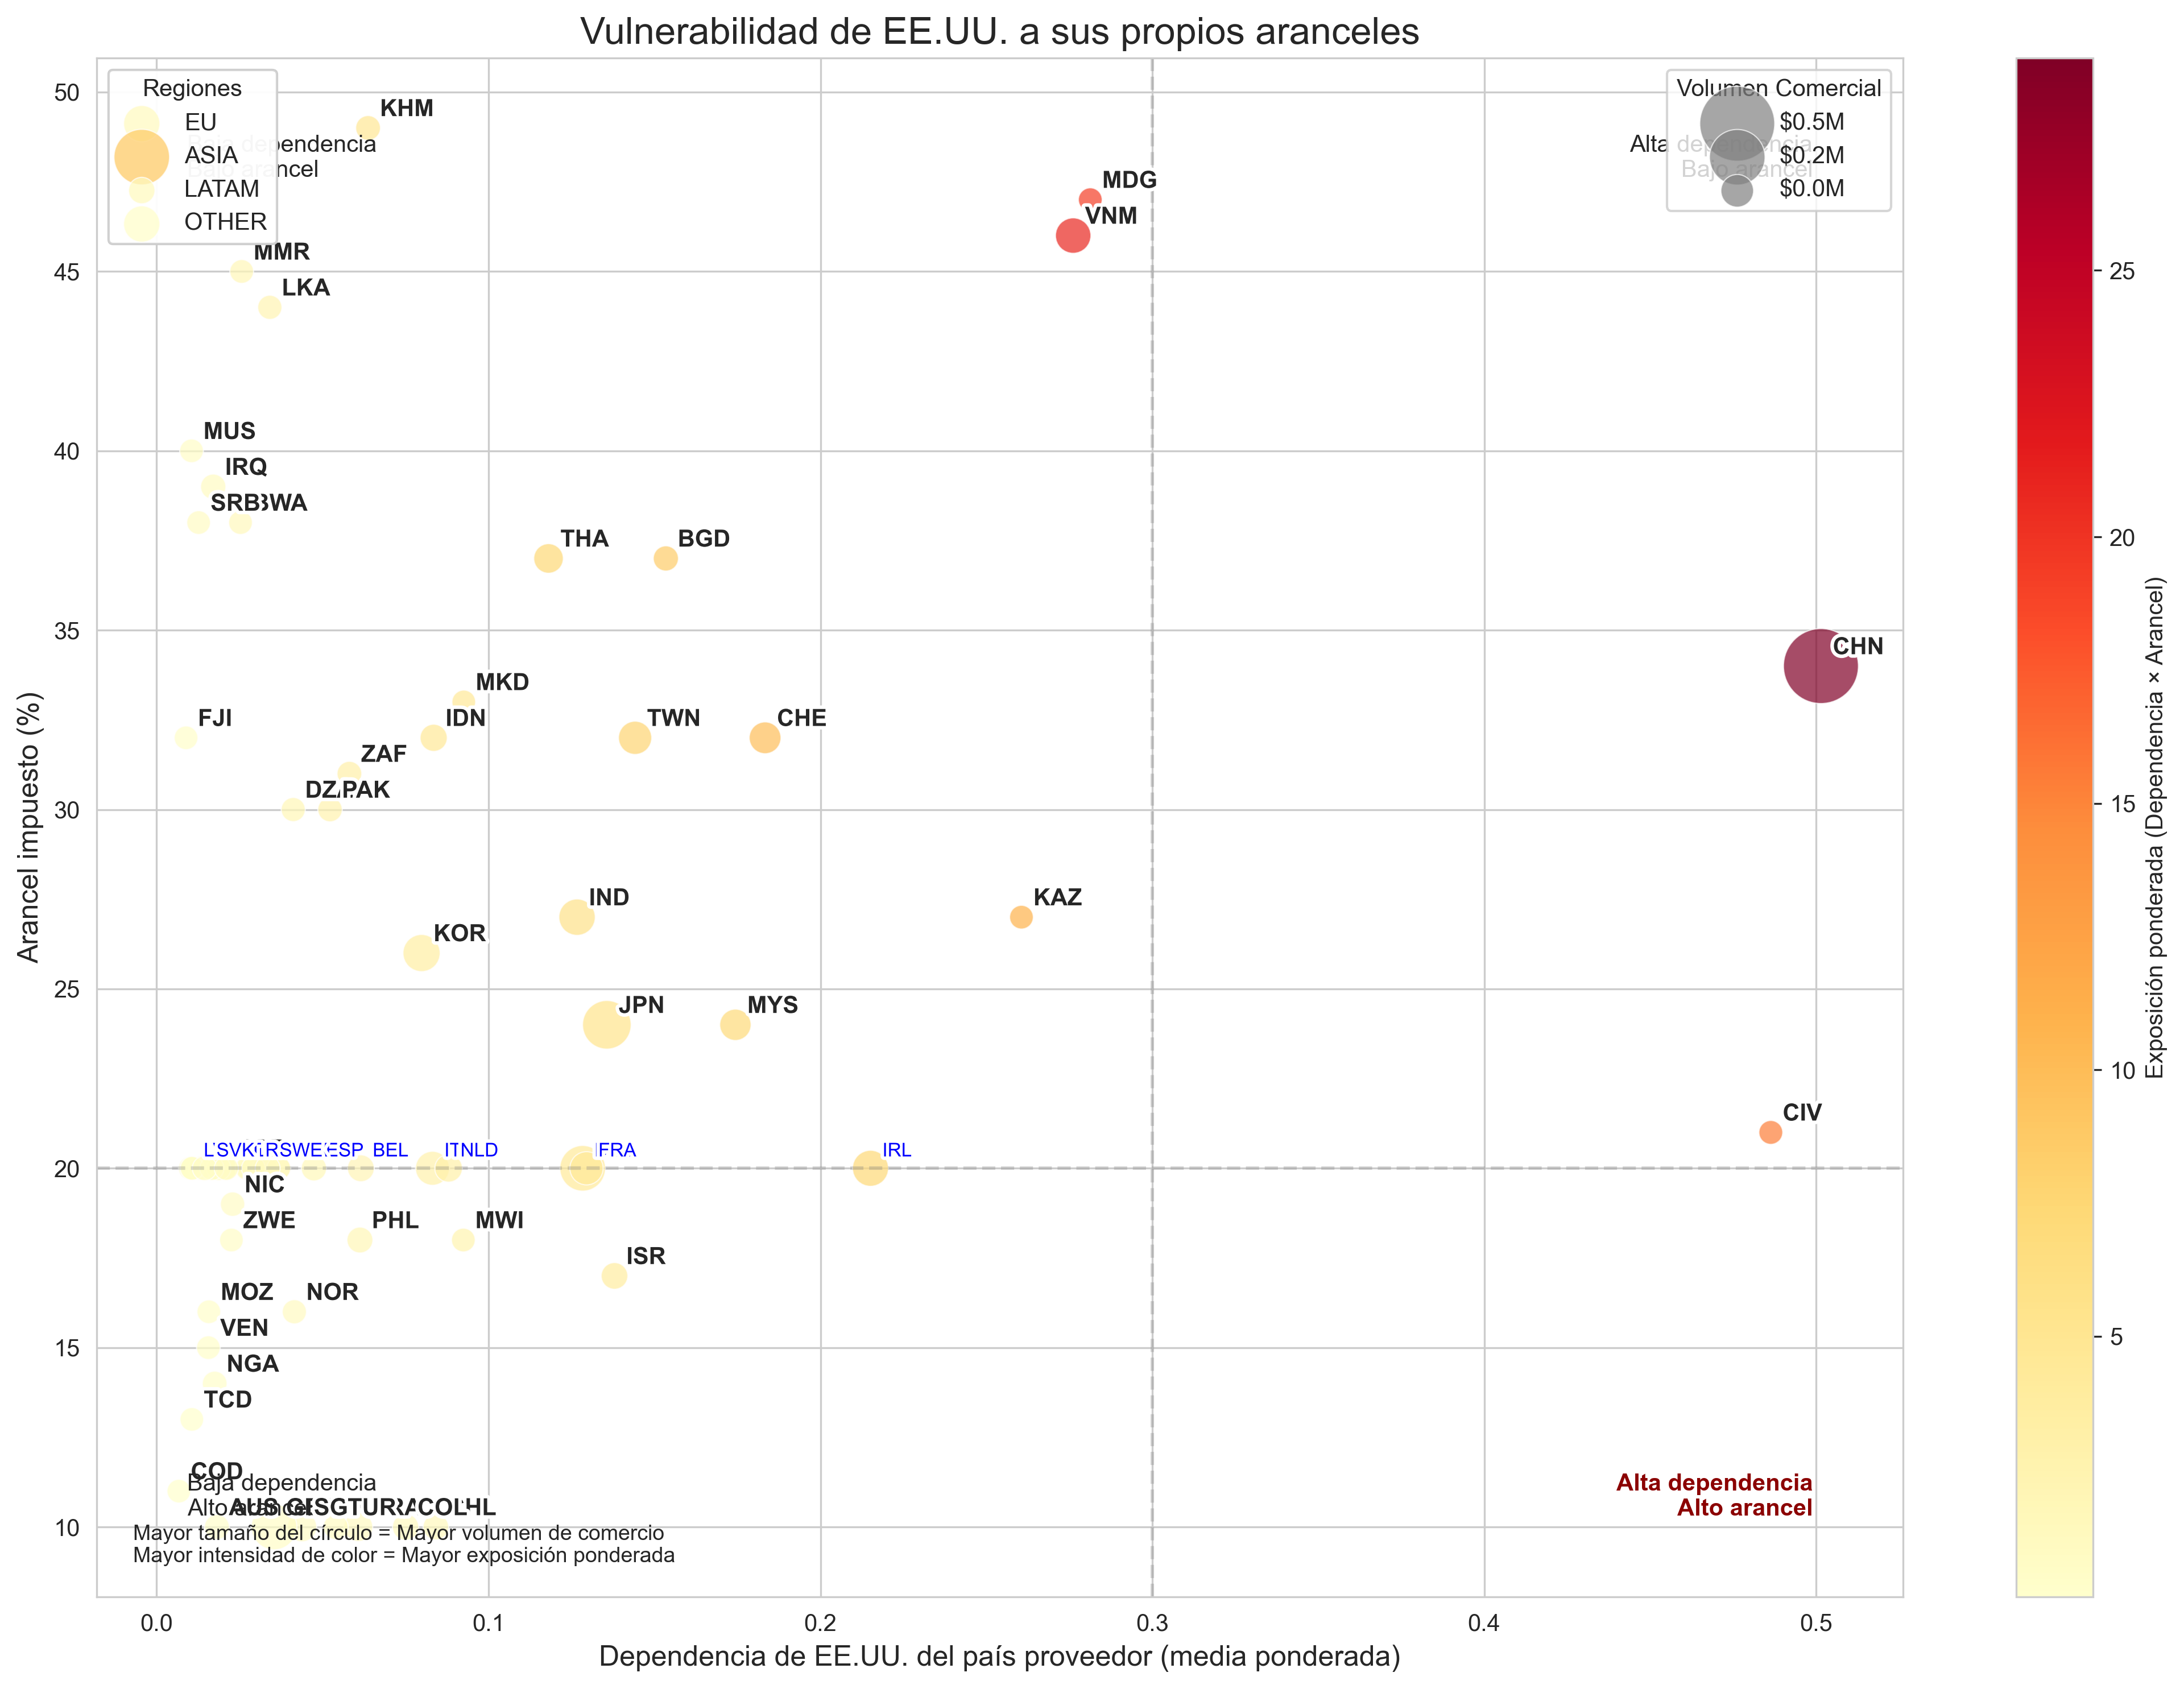

In [17]:
resultados = analizar_vulnerabilidad_eeuu(df_full, aranceles, output_path_fig, min_dependency=0.005)